<a href="https://colab.research.google.com/github/AISaturdaysLagos/cohort8_materials/blob/lab4/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Welcome to Lab 4 :Relational Data and SQL**

This notebook explores the practical aspects of relational data with SQL using the AdventureWorks database from Microsoft on [Kaggle](https://www.kaggle.com/datasets/ukveteran/adventure-works?resource=download).

Note : The data has been modified to suit this lab and may not be the exact replica of the one from Microsoft.

Check notebook to see data transformation and cleaning [here ](https://colab.research.google.com/drive/1WFDIW7AqZHlgHMidIxXA1i65FDOuOcZA?usp=sharing)




**Getting Started**

1. Follow the [link](https://drive.google.com/drive/folders/1DuvKFB-fFxdJfL4sYVJEMRlrEWoG3uls?usp=share_link) to download or make a copy of the database, you can either save it on your drive or upload during runtime session. For this lab you only need to save the lab.db file
2. You can see the raw SQL queries for this lab  [here](https://docs.google.com/document/d/1riGAd1DDtTPNqs6_ZwFVoPxEwThdFwLVuPtmy9O0dfs/edit?usp=sharing) in plain text

In [43]:
# If connecting with google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import sqlite3
import pandas as pd

In [ ]:
# If connecting from uploaded file, create connection directly
connection = sqlite3.connect('lab.db')

In [45]:
# If connecting from google drive, past the right path and create connection
connection = sqlite3.connect('/content/drive/MyDrive/lab4data/lab.db')

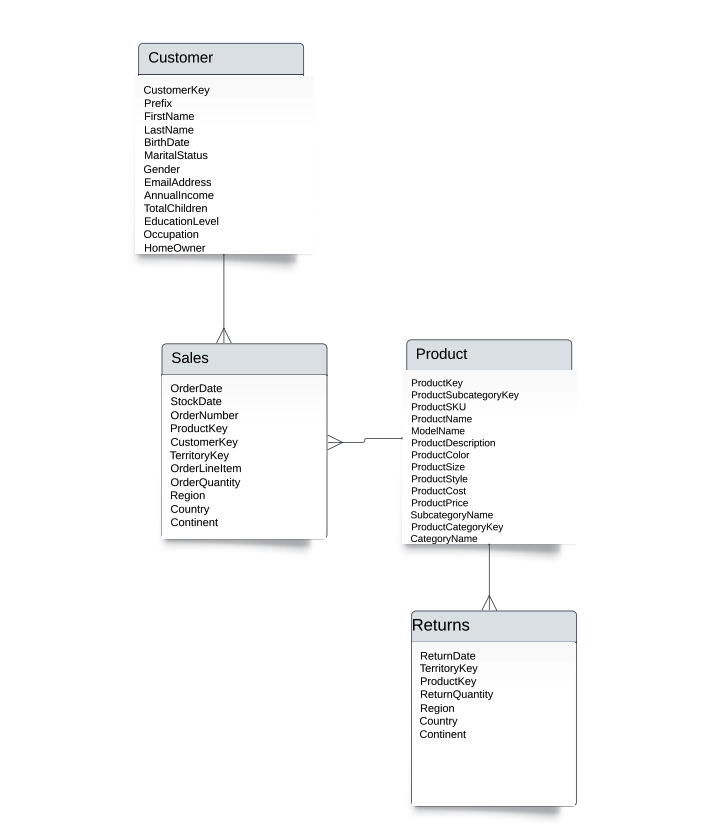

Quiz
1. What is the primary key of the customer table?
2. What can be an alternative primary key?

# Section 1 : Practising SQL basics

SELECT *  is used to select all columns in a table, otherwise you can select the specific columns to see

In [37]:
sales_df=pd.read_sql_query("SELECT  * FROM sales", connection)
sales_df.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,North America
1,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,Pacific
2,2016-01-01,2002-11-29,SO48801,326,15493,1,1,1,Northwest,United States,North America
3,2016-01-01,2002-11-16,SO48799,352,26708,4,1,1,Southwest,United States,North America
4,2016-01-01,2002-12-16,SO48798,369,23332,9,1,1,Australia,Australia,Pacific


In [46]:
customer_df = pd.read_sql_query("SELECT * FROM customer", connection)
customer_df.head(5)

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y
1,11001,EUGENE,HUANG,5/14/1965,S,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N
2,11002,RUBEN,TORRES,8/12/1965,M,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y
3,11003,CHRISTY,ZHU,2/15/1968,S,christy12@adventure-works.com,70000,0,Bachelors,Professional,N
4,11004,ELIZABETH,JOHNSON,8/8/1968,S,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Y


In [47]:
product_df = pd.read_sql_query("SELECT * FROM products", connection)
product_df.head(5)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,4,Accessories
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,4,Accessories
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,Socks,3,Clothing
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,Socks,3,Clothing
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442,Helmets,4,Accessories


In [48]:
returns_df = pd.read_sql_query("SELECT * FROM returns", connection)
returns_df.head(5)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Region,Country,Continent
0,2015-01-18,9,312,1,Australia,Australia,Pacific
1,2015-01-18,10,310,1,United Kingdom,United Kingdom,Europe
2,2015-01-21,8,346,1,Germany,Germany,Europe
3,2015-01-22,4,311,1,Southwest,United States,North America
4,2015-02-02,6,312,1,Canada,Canada,North America


## Statistical Operations

Alias is a temporary name given to a table or a column that can be used to reference it in another context, it can be used to make the columns or tables more readable

They can be used with the AS keyword or by placing it infront of the table name or column

In [56]:
# count
result= pd.read_sql_query("SELECT COUNT(customerkey) as count FROM customer", connection)
result['count'][0]

,count
0,36296


In [60]:
#average
result= pd.read_sql_query("SELECT AVG(AnnualIncome)as average FROM customer", connection)
average_income = round(result['avg'][0],2)
average_income

57269.12

In [54]:
#min , it can be used on text
result= pd.read_sql_query("SELECT MIN(AnnualIncome)as minimum_annual_ FROM customer", connection)
result['min'][0]

10000

In [55]:
#max, it can be used on text
result= pd.read_sql_query("SELECT MAX(AnnualIncome)as max FROM customer", connection)
result['max'][0]

170000

## Filtering
There are different operators that can be used to filter data with SQL using the WHERE keyword

Operators |use
-----|-----
> |Greater than
< |Less than
= |Equal to
>= |Greater than or equal to
<= |Less than or equal to
<> | Not equal to
IN|In a list of values
NOT IN | Not in a list of values
BETWEEN |In a range of values
LIKE|For matching text

In [63]:
# get products where ProductDescription starts with Universal
result = pd.read_sql_query("SELECT ProductName , ProductDescription FROM products WHERE ProductDescription LIKE 'Universal%'  ", connection) #not case sensitive
result

,ProductName,ProductDescription
0,"Sport-100 Helmet, Red","Universal fit, well-vented, lightweight , snap..."
1,"Sport-100 Helmet, Black","Universal fit, well-vented, lightweight , snap..."
2,"Sport-100 Helmet, Blue","Universal fit, well-vented, lightweight , snap..."


In [64]:
# get products where ProductName ends with Black
result = pd.read_sql_query("SELECT ProductName , ProductDescription FROM products WHERE ProductName LIKE '%Black' ", connection) #not case sensitive
result

,ProductName,ProductDescription
0,"Sport-100 Helmet, Black","Universal fit, well-vented, lightweight , snap..."


In [65]:
# get products where ProductDescription contains lightweight
result = pd.read_sql_query(" SELECT ProductName , ProductDescription FROM products WHERE ProductDescription LIKE '%lightweight%' ", connection) #not case sensitive
result

,ProductName,ProductDescription
0,"Sport-100 Helmet, Red","Universal fit, well-vented, lightweight , snap..."
1,"Sport-100 Helmet, Black","Universal fit, well-vented, lightweight , snap..."
2,"Sport-100 Helmet, Blue","Universal fit, well-vented, lightweight , snap..."
3,"ML Road Frame - Red, 44",Made from the same aluminum alloy as our top-o...
4,"ML Road Frame - Red, 48",Made from the same aluminum alloy as our top-o...
5,"ML Road Frame - Red, 52",Made from the same aluminum alloy as our top-o...
6,"ML Road Frame - Red, 58",Made from the same aluminum alloy as our top-o...
7,"ML Road Frame - Red, 60",Made from the same aluminum alloy as our top-o...
8,"ML Road Frame-W - Yellow, 38",Made from the same aluminum alloy as our top-o...
9,"ML Road Frame-W - Yellow, 40",Made from the same aluminum alloy as our top-o...


**WHERE vs HAVING**

The WHERE clause is used to filter your data and can be used on multiple data types such as string , numeric, dates etc

The WHERE cannot be used in agreggrations while  HAVING can be used

In [ ]:
# customers who have ordered more than once
result = pd.read_sql_query(" ", connection)
result

In [67]:
result= pd.read_sql_query("SELECT SUM(AnnualIncome)as totalincome,Occupation FROM customer GROUP BY Occupation", connection)
result

,totalincome,Occupation
0,175520000,Clerical
1,555340000,Management
2,77520000,Manual
3,804560000,Professional
4,465700000,Skilled Manual


In [71]:
result = pd.read_sql_query("SELECT COUNT(Customerkey) AS count, customerkey from sales GROUP BY customerKey HAVING count > 1 ", connection)
result

,count,CustomerKey
0,7,11000
1,10,11001
2,3,11002
3,8,11003
4,5,11004
...,...,...
15084,3,29472
15085,2,29473
15086,3,29477
15087,3,29478


## Date And Time Functions

%d		day of month: 00

%H		hour: 00-24

%j		day of year: 001-366

%m		month: 01-12

%M		minute: 00-59

%w		day of week 0-6 with Sunday==0

%W		week of year: 00-53

%Y		year: 0000-9999

In [75]:
# Number of Orders for each month IN 2015
result = pd.read_sql_query("""SELECT count(OrderNumber) as number_of_orders,
                strftime('%d',OrderDate) as month from sales WHERE OrderDate
                BETWEEN '2015-01-01' AND '2015-01-31'  GROUP BY month """, connection)
result

,number_of_orders,month
0,4,01
1,4,02
2,8,03
3,5,04
4,3,05
5,6,06
6,4,07
7,8,08
8,4,09
9,4,10


# Joins

**Left Join**

A LEFT JOIN returns all the rows from Left table, even if there are no matches in the right table

In [76]:
result = pd.read_sql_query('''SELECT * FROM customer as a
                                LEFT JOIN sales as b on a.customerKey=b.customerKey WHERE
                                emailaddress='clayton0@adventure-works.com' ''', connection)
result

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,...,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,29482,CLAYTON,ZHANG,3/5/1959,M,clayton0@adventure-works.com,30000,3,Bachelors,Clerical,...,2002-12-10,SO49746,358,29482,7,1,1,France,France,Europe
1,29482,CLAYTON,ZHANG,3/5/1959,M,clayton0@adventure-works.com,30000,3,Bachelors,Clerical,...,2002-12-10,SO49746,358,29482,7,1,1,France,France,Europe


In [77]:
# implemeting left join in pandas
result= pd.merge(customer_df,sales_df, how="left", on='CustomerKey')
result.head(5)

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,...,StockDate,OrderNumber,ProductKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent,new
0,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,...,2003-05-02,SO51522,485,9,2,2.0,Australia,Australia,Pacific,4.0
1,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,...,2003-04-12,SO51522,352,9,1,1.0,Australia,Australia,Pacific,1.0
2,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,...,2003-08-11,SO57418,530,9,3,2.0,Australia,Australia,Pacific,4.0
3,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,...,2003-08-10,SO57418,541,9,2,2.0,Australia,Australia,Pacific,4.0
4,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,...,2003-08-17,SO57418,214,9,4,1.0,Australia,Australia,Pacific,1.0


In [80]:
# What are the top 5 categories sold
result = pd.read_sql_query('''SELECT SUM(OrderQuantity) as QuantitySold, SubcategoryName,
                                  CategoryName
                              FROM sales as a LEFT JOIN products as b on  a.ProductKey = b.ProductKey
                              GROUP BY SubcategoryName
                              ORDER BY QuantitySold DESC
                              LIMIT 5 ''', connection)
result

,QuantitySold,SubcategoryName,CategoryName
0,29772,Tires and Tubes,Accessories
1,15106,Bottles and Cages,Accessories
2,7099,Road Bikes,Bikes
3,6034,Helmets,Accessories
4,4706,Mountain Bikes,Bikes


**Right Join**

A RIGHT JOIN returns all the rows from right table, even if there are no matches in the left table

In [81]:
result = pd.read_sql_query(''' SELECT * FROM products as  a

                               LEFT JOIN sales as b on a.ProductKey = b.ProductKey''', connection)
result

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,...,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,2003-03-08,SO51181,214,12132,7,4,1.0,France,France,Europe
1,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,2003-04-25,SO51180,214,16313,8,4,1.0,Germany,Germany,Europe
2,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,2003-03-04,SO51192,214,11241,7,2,1.0,France,France,Europe
3,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,2003-06-11,SO51191,214,12390,8,4,1.0,Germany,Germany,Europe
4,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,...,2003-03-20,SO51207,214,11338,8,4,1.0,Germany,Germany,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56204,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,Black,52,U,343.6496,...,2004-03-29,SO74010,606,24254,4,2,1.0,Southwest,United States,North America
56205,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,Black,52,U,343.6496,...,2004-04-09,SO74008,606,21386,4,1,1.0,Southwest,United States,North America
56206,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,Black,52,U,343.6496,...,2004-06-04,SO74028,606,27471,9,1,1.0,Australia,Australia,Pacific
56207,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,Black,52,U,343.6496,...,2004-05-02,SO74094,606,29345,9,1,1.0,Australia,Australia,Pacific


In [82]:
# implementing right join in pandas
result= pd.merge(sales_df,customer_df ,how="right", on='CustomerKey')
result =result[result['OrderNumber'].isnull()]
result

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
260,NaN,NaN,NaN,NaN,11051,NaN,NaN,NaN,NaN,NaN,...,DANIEL,JOHNSON,8/4/1951,S,daniel18@adventure-works.com,30000,3,High School,Skilled Manual,N
745,NaN,NaN,NaN,NaN,11133,NaN,NaN,NaN,NaN,NaN,...,ANGELA,GRIFFIN,9/8/1980,S,angela23@adventure-works.com,30000,0,Partial High School,Clerical,N
2453,NaN,NaN,NaN,NaN,11349,NaN,NaN,NaN,NaN,NaN,...,MINDY,LUO,9/3/1954,M,mindy10@adventure-works.com,10000,2,Partial College,Manual,Y
2897,NaN,NaN,NaN,NaN,11435,NaN,NaN,NaN,NaN,NaN,...,ROBIN,ROMERO,3/6/1950,S,robin5@adventure-works.com,100000,3,Partial College,Management,Y
2920,NaN,NaN,NaN,NaN,11441,NaN,NaN,NaN,NaN,NaN,...,ERIKA,GOMEZ,6/12/1947,M,erika0@adventure-works.com,90000,5,Partial High School,Skilled Manual,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113522,NaN,NaN,NaN,NaN,29466,NaN,NaN,NaN,NaN,NaN,...,LANCE,JIMENEZ,11/26/1943,M,lance5@adventure-works.com,30000,1,Bachelors,Clerical,Y
113523,NaN,NaN,NaN,NaN,29467,NaN,NaN,NaN,NaN,NaN,...,MONICA,MEHTA,10/16/1961,M,monica14@adventure-works.com,30000,4,Graduate Degree,Clerical,Y
113532,NaN,NaN,NaN,NaN,29471,NaN,NaN,NaN,NaN,NaN,...,DANA,ORTEGA,3/26/1960,S,dana15@adventure-works.com,10000,1,High School,Manual,N
113538,NaN,NaN,NaN,NaN,29474,NaN,NaN,NaN,NaN,NaN,...,JAIME,RAJE,10/4/1959,M,jaime36@adventure-works.com,20000,2,Partial College,Manual,N


**Inner Join**

An INNER JOIN returns all the rows from both joined tables, with matching rows based on the join keys

In [83]:
result = pd.read_sql_query(''' SELECT * FROM sales as a INNER JOIN customer as b on a.CustomerKey = b.customerKey
LIMIT 5''', connection)
result

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
1,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
2,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,...,EBONY,SARA,4/4/1970,M,ebony10@adventure-works.com,120000,0,Partial High School,Professional,N
3,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,...,EBONY,SARA,4/4/1970,M,ebony10@adventure-works.com,120000,0,Partial High School,Professional,N
4,2016-01-01,2002-11-29,SO48801,326,15493,1,1,1,Northwest,United States,...,ERIC,CHEN,9/19/1968,M,eric33@adventure-works.com,70000,2,Bachelors,Skilled Manual,Y


In [84]:
# implementing inner join in pandas
result= pd.merge(sales_df,customer_df ,how="inner", on='CustomerKey')
result.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
1,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
2,2016-11-30,2003-08-31,SO58885,215,14335,1,2,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
3,2016-11-30,2003-08-31,SO58885,215,14335,1,2,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
4,2016-11-30,2003-08-18,SO58885,587,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y


**Full Join**

A FULL JOIN returns all the rows from both joined tables, whether they have a matching row or not. FULL OUTER JOIN and FULL JOIN are the same.

In [ ]:
result = pd.read_sql_query('''
SELECT *
FROM sales  as a
FULL JOIN products as b on  a.ProductKey = b.ProductKey
LIMIT 2

''', connection) #Not available in SQLite but available in some other database engines
result

In [86]:
# implementing full join in pandas
result= pd.merge(sales_df,product_df ,how="outer", on='ProductKey')
#result =result[(result['OrderNumber'].isnull() ) | (result['CustomerKey'].isnull())]
#result =result[result['ProductKey'].isnull()]
result.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1.0,Northwest,United States,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,Road Bikes,1,Bikes
1,2016-01-17,2002-11-28,SO48932,385,14297,4,1,1.0,Southwest,United States,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,Road Bikes,1,Bikes
2,2016-01-22,2002-10-31,SO48970,385,26529,6,1,1.0,Canada,Canada,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,Road Bikes,1,Bikes
3,2016-01-29,2002-11-24,SO49020,385,19035,8,1,1.0,Germany,Germany,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,Road Bikes,1,Bikes
4,2016-02-06,2002-11-17,SO49237,385,25035,9,1,1.0,Australia,Australia,...,Road-550-W,Same technology as all of our Road series bike...,Yellow,42,W,605.6492,1000.4375,Road Bikes,1,Bikes


**Cross Join**

A CROSS JOIN returns a combination of each row from the first table with each row from the second table

In [87]:
result = pd.read_sql_query(''' SELECT * FROM sales as a
CROSS JOIN customer
limit 5
''', connection)
result

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y
1,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,EUGENE,HUANG,5/14/1965,S,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N
2,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,RUBEN,TORRES,8/12/1965,M,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y
3,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,CHRISTY,ZHU,2/15/1968,S,christy12@adventure-works.com,70000,0,Bachelors,Professional,N
4,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ELIZABETH,JOHNSON,8/8/1968,S,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Y


In [88]:
# implementing cross join in pandas
sales_sample_df= sales_df[sales_df['ProductKey']=='385']
customer_sample_df= customer_df[customer_df['CustomerKey']=='14335']
result= pd.merge(sales_sample_df,customer_sample_df ,how="cross")
result.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey_x,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,...,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
1,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
2,2016-01-17,2002-11-28,SO48932,385,14297,4,1,1,Southwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
3,2016-01-17,2002-11-28,SO48932,385,14297,4,1,1,Southwest,United States,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y
4,2016-01-22,2002-10-31,SO48970,385,26529,6,1,1,Canada,Canada,...,ALLISON,COX,9/13/1978,M,allison9@adventure-works.com,40000,0,High School,Skilled Manual,Y


## Window functions & CTEs
Window function performs a calculation across a set of table rows that are somehow related to the current row.

Common Table Expression CTEs allow you to create a temporary table that can be used in a SQL query

In [91]:
#creating a simple CTE
result = pd.read_sql_query(''' WITH salesOutput as (SELECT OrderNumber,OrderDate  FROM sales
 WHERE ProductKey = '477' LIMIT 5
)
SELECT OrderDate , OrderNumber from salesOutput


''', connection)
result

,OrderDate,OrderNumber
0,2016-07-01,SO51180
1,2016-07-01,SO51178
2,2016-07-02,SO51196
3,2016-07-02,SO51191
4,2016-07-02,SO51199


In [93]:

result = pd.read_sql_query(''' SELECT * from sales where OrderNumber= 'SO51196' ORDER BY OrderDate ''', connection)
result

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-07-02,2003-05-02,SO51196,477,18906,9,3,2,Australia,Australia,Pacific
1,2016-07-02,2003-05-20,SO51196,479,18906,9,2,2,Australia,Australia,Pacific
2,2016-07-02,2003-04-28,SO51196,220,18906,9,4,1,Australia,Australia,Pacific
3,2016-07-02,2003-04-06,SO51196,232,18906,9,5,1,Australia,Australia,Pacific
4,2016-07-02,2003-04-22,SO51196,604,18906,9,1,1,Australia,Australia,Pacific


In [100]:
#creating a simple window function with min
result = pd.read_sql_query(''' SELECT OrderDate, MIN(StockDate) OVER (PARTITION BY OrderNumber ) AS firstOrderDate  FROM sales  WHERE OrderNumber= 'SO51196' ''', connection)
result

,OrderDate,firstOrderDate
0,2016-07-02,2003-04-06
1,2016-07-02,2003-04-06
2,2016-07-02,2003-04-06
3,2016-07-02,2003-04-06
4,2016-07-02,2003-04-06


In [105]:
#creating a simple window function with sum
result = pd.read_sql_query(''' WSELECT OrderDate,
                                  MIN(OrderDate) OVER(PARTITION BY ProductKey) as first_order
                                  ,ProductKey
                                  FROM sales  LIMIT 5

                               ''', connection)
result

,quantitysold,productKey,Region,row_number
0,1523,477,Australia,1
1,1266,480,Australia,2
2,975,479,Australia,3
3,971,528,Australia,4
4,946,529,Australia,5
...,...,...,...,...
952,3,344,United Kingdom,125
953,2,351,United Kingdom,126
954,2,348,United Kingdom,127
955,2,346,United Kingdom,128


In [ ]:
#What is the top selling product in each region
result = pd.read_sql_query(''' with a as (
           SELECT SUM(OrderQuantity) as QuantitySold ,ProductKey,Region,
             ROW_NUMBER() OVER(PARTITION BY Region ORDER BY  COUNT(OrderNumber) desc) AS RankNum
              FROM sales  group by Region,ProductKey)

               SELECT * FROM a where rank_num=1
''', connection)
result

## CASE statements

In [ ]:
#Categorize into two groups, high sales and low sales based on the total value of the order for each product
result = pd.read_sql_query(''' SELECT ProductName,
       CASE WHEN SUM(OrderQuantity*ProductPrice) > 20000 THEN "High sales"
            WHEN SUM(OrderQuantity*ProductPrice) < 20000 THEN "Low Sales"   END AS price_category
FROM sales as a LEFT JOIN products as b on  a.ProductKey = b.ProductKey
GROUP by a.ProductKey
ORDER BY ProductName
''',connection)
result

## Sub Query

In [ ]:
# using a sub query get the total number of orders by customers in different occupations in January 2015
result = pd.read_sql_query(''' SELECT distinct Occupation,count(orderNumber) as NumberofOrders FROM sales
                                  LEFT JOIN customer on sales.CustomerKey = customer.CustomerKey
                              WHERE ProductKey in (Select ProductKey FROM sales where OrderDate BETWEEN '2015-01-18' AND  '2015-01-31' )  GROUP BY Occupation ORDER BY NumberofOrders DESC ''', connection)
result

## References

[SQLite](https://www.sqlite.org/index.html)

[SQLite SQL syntax](https://www.sqlite.org/lang.html)

[Python sqlite3 library](https://www.sqlite.org/lang.html)

[SQLite data types](https://learn.microsoft.com/en-us/dotnet/standard/data/sqlite/types)

[Pandas merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)